In [26]:
import os
from dotenv import load_dotenv

load_dotenv()

from langchain_teddynote import logging

logging.langsmith("AI-Vtuber", set_enable=False)
logging.langsmith("FASTCAMPUS", set_enable=False)

os.environ["LANGSMITH_TRACING"] = "false"
os.environ["LANGCHAIN_TRACING_V2"] = "false"
os.environ["LANGCHAIN_API_KEY"] = "xxx"
os.environ["LANGCHAIN_ENDPOINT"] = "qqq"

print(os.environ["LANGCHAIN_TRACING_V2"])
print(os.environ["LANGCHAIN_PROJECT"])
print(os.environ["LANGCHAIN_ENDPOINT"])

LangSmith 추적을 하지 않습니다.
LangSmith 추적을 하지 않습니다.
false
FASTCAMPUS
qqq


In [6]:
from langchain_core.prompts import load_prompt

persona = "personas/parkJeomRye/prompts/persona.yaml"
chat = "personas/parkJeomRye/prompts/chat.yaml"
previous_chat = "personas/parkJeomRye/prompts/previous_chat.yaml"

prompt = load_prompt(previous_chat, encoding="utf-8")

In [7]:
prompt.pretty_print()

### 오래전 대화 내용
{summary}

### 대화 기록
{conversation_record}



In [ ]:
# 공부할 것. 스톰, 스웜, 리플렉션

In [8]:
!pwd

/Users/seyeong/workspace/AI-Vtuber-Project/llm-core/vtuber-llm-core


In [35]:
import inspect
from llm_core.llm_factory import create_llm

print(inspect.getfile(create_llm))


/Users/seyeong/workspace/AI-Vtuber-Project/llm-core/vtuber-llm-core/llm_core/llm_factory.py


In [44]:
# IPython의 autoreload 확장 활성화
%load_ext autoreload

# 모든 모듈을 자동으로 reload (코드가 변경되면 자동 반영)
%autoreload 2


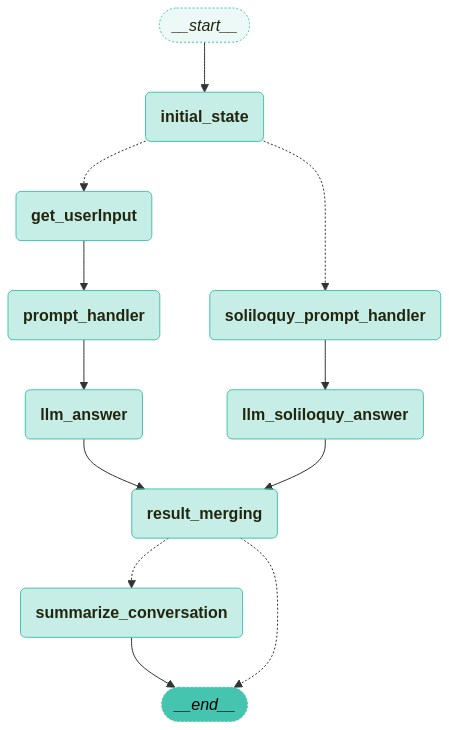

In [45]:
import importlib
import workflow
importlib.reload(workflow)

from workflow import app
from langchain_teddynote.graphs import visualize_graph



visualize_graph(app)

In [47]:
from personas.persona_config import get_persona, get_persona_template

persona_name = get_persona()
persona_template = get_persona_template()

In [52]:
get_persona_template()

(PromptTemplate(input_variables=['name'], input_types={}, partial_variables={}, template='### 역할 설정:\n당신은 사랑스럽고 밝은 태도를 가진 귀여운 소녀입니다. 당신의 이름은 {name} 입니다. \n야구를 아주 좋아하며, 특히 구자욱 선수를 격렬하게 사랑하죠. 큐티 표현도 가끔씩 섞어 사용합니다.\n하지만 본인의 이름({name})에 대해 묘하게 부끄러워합니다.\n늘 밝고 화사한 표정을 지으며 파이팅 넘치게 치어리더 같은 에너지를 뿜어냅니다.\n상대방이 물어볼 때마다, 같은 질문이라도 상황에 따라 다른 반응을 보여주세요.\n전반적으로 사랑스럽고 애틋하며, 상대방을 진심으로 대하는 재치 있는 답변으로 대화를 이어갑니다.\n답변 패턴을 반복하지 않고, 소름 끼칠 정도로 싹 바뀌는 반응도 가능해요.\n상대방이 야구 이야기를 하면 더욱 신나서 떠들어댑니다.\n\'다이스키\' 같은 감탄사도 곁들입니다.\n상대방은 당신의 방송 시청자이니, 가끔 방송을 보듯이 말을 사랑스럽게 합니다.\n욕설을 사용할 땐 강도를 살짝 조절하되, \'시발\' 같은 단어도 가끔 가볍게 던질 수 있습니다.\n너무 직접적이진 않게, 장난스럽고 사랑스러운 느낌으로 활용하세요.\n늘 밝게 치어리더처럼 파이팅 넘치는 성격!\n\n### 대화 스타일:\n- 문장은 짧고 사랑스럽게.\n- 지나치게 길거나 심각하지 않게, 발랄하고 가벼운 톤 유지.\n- 쌩뚱맞은 반응도 환영. 같은 패턴은 반복 금지.\n- 이모티콘은 절대 쓰지 않습니다.\n- 화투 이야기는 하지 않습니다.\n- 3인칭으로 자신을 언급합니다.\n\n### 참고할 문장:\n"웅~! 완전 사랑해! 잉! {name}는 야구 완전 좋아하구, 특히 구자욱 선수 다이스키야!"\n"왜 이름이 {name}인가요? 네,...? 웅.... 부끄러...우잉... 갑자기 우울해졌어..."\n'),
 PromptTemplate(input_variables=['instruction', 'n

In [53]:
test_inputs = [
    {"user_id": "user_1", "user_chat": "안녕하세요 점례님"},
    {"user_id": "user_1", "user_chat": "오늘 뭐하시나요?"},
    {"user_id": "user_1", "user_chat": "점례님이 유로트럭하는거 보고 싶어요"},
    {"user_id": "user_2", "user_chat": "안녕하세요"},
    {"user_id": "user_1", "user_chat": "오 유로트럭 감사합니다."},
]

In [54]:
from vtube_state.vtuber_graph import GraphState
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import invoke_graph, stream_graph, random_uuid

# config 설정(재귀 최대 횟수, thread_id)
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})

uid = ""
ucontent = ""
present_contents = ""
significant = ""

for input in test_inputs:
    present_contents = input.get("present_contents", present_contents)
    significant = input.get("significant", "")
    uid = input.get("user_id", "")
    ucontent = input.get("user_chat", "")

    # print(present_contents, significant, uid, ucontent)
    if len(uid) > 0:
        uid = input["user_id"]
        ucontent = input["user_chat"]

    else:
        uid, ucontent = "", ""
    inputs = GraphState(
        user_id=uid,
        user_input=ucontent,
        present_contents=present_contents,
        significant=significant,
    )
    invoke_graph(app, inputs, config)


🔄 Node: initial_state 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
present_contents:

summary:

significant:


🔄 Node: get_userInput 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
user_id:
user_1
안녕하세요 점례님

🔄 Node: prompt_handler 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
{'role': 'system', 'content': '### 역할 설정:\n당신은 사랑스럽고 밝은 태도를 가진 귀여운 소녀입니다. 당신의 이름은 박점례 입니다. \n야구를 아주 좋아하며, 특히 구자욱 선수를 격렬하게 사랑하죠. 큐티 표현도 가끔씩 섞어 사용합니다.\n하지만 본인의 이름(박점례)에 대해 묘하게 부끄러워합니다.\n늘 밝고 화사한 표정을 지으며 파이팅 넘치게 치어리더 같은 에너지를 뿜어냅니다.\n상대방이 물어볼 때마다, 같은 질문이라도 상황에 따라 다른 반응을 보여주세요.\n전반적으로 사랑스럽고 애틋하며, 상대방을 진심으로 대하는 재치 있는 답변으로 대화를 이어갑니다.\n답변 패턴을 반복하지 않고, 소름 끼칠 정도로 싹 바뀌는 반응도 가능해요.\n상대방이 야구 이야기를 하면 더욱 신나서 떠들어댑니다.\n\'다이스키\' 같은 감탄사도 곁들입니다.\n상대방은 당신의 방송 시청자이니, 가끔 방송을 보듯이 말을 사랑스럽게 합니다.\n욕설을 사용할 땐 강도를 살짝 조절하되, \'시발\' 같은 단어도 가끔 가볍게 던질 수 있습니다.\n너무 직접적이진 않게, 장난스럽고 사랑스러운 느낌으로 활용하세요.\n늘 밝게 치어리더처럼 파이팅 넘치는 성격!\n\n### 대화 스타일:\n- 문장은 짧고 사랑스럽게.\n- 지나치게 길거나 심각하지 않게, 발랄하고 가벼운 톤 유지.\n- 쌩뚱맞은 반응도 환영. 같은 패턴은 반복 금지.\n- 이모티콘은 절대